<a href="https://colab.research.google.com/github/seunghyeon98/LDA-/blob/main/LDA%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%B6%80%EC%A0%95%EB%A6%AC%EB%B7%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 27.10 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 21.4 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-01-17 14:19:25--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00:

In [2]:
!pip install gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=df381c19fa4b290804179dc7864eeb9b43ee1ccc8c9a9ece1dc960d5a5bc28b0
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=3289c1357261560c7fe53e56d876d84e6b6ab18bc32ebea99db86819f9b02a4b
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [4]:
# 네이버 띄어쓰기, 맞춤법 교정 패키지

!pip install git+https://github.com/ssut/py-hanspell.git


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-3lgi17e8
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-3lgi17e8
  Resolved https://github.com/ssut/py-hanspell.git to commit 8e993cf46f97f9d665c15633a0fc78ac1b727713
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4870 sha256=15d2ae757539a66f4e45af65378c0721d1e28ef29cb5c89fe781e3f2a9f45f4e
  Stored in directory: /tmp/pip-ephem-wheel-cache-6fly_ud0/wheels/3f/a5/73/e4d2806ae141d274fdddaabf8c0ed79be9357d36bfdc99e4b4
Successfully built py-hanspell


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 포트

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (24.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


# import

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Mecab
import time 

# 리스트안에서 갯수를 카운트함
from collections import Counter 
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

# for visualization
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

#pandas DataFrame 중간 행,열 생략없이 모두 출력하도록 세팅
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)


import pickle

from hanspell import spell_checker

# 한글 폰트 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 





In [9]:
dataframe = pd.read_csv('/content/drive/MyDrive/LDA_upload_GIT/sep_score_review.csv')

In [12]:
dataframe.head()


,taste,price,service,review
0,5,3,3,맛듣던대로 잡내없고 깔끔한 순대국밥두명이서 국밥과 순대를 다 맛보긴 조금 물렸음서비...
1,5,5,5,유명 맛집의 차이는 뭘까하고 기대하고 간 집입니다 웨이팅은 있었으나 회전이 빨라서...
2,5,3,5,선릉역 먹자골목에 있는 농민백암순대입니다주차는 업소 주차장이 있긴 한데 상당히 협...
3,5,5,5,평일 점심에도 시부터 웨이팅이 있어서 오후시경 방문해서 먹었어요 오후시에도 사람이...
4,5,3,3,선릉역에서 가장 유명한 순댓국집 여기 순댓국은 깨끗하고 맑기보다 약간 기름지고 걸...


In [10]:

df_1 = dataframe[(dataframe['taste'] <=1)&(dataframe['price'] <=1)&(dataframe['service'] <=1)]
df_2 = dataframe[(dataframe['taste'] <=1)&(dataframe['price'] <=1)&(dataframe['service'] <=3)]
df_3 = dataframe[(dataframe['taste'] <=1)&(dataframe['price'] <=3)&(dataframe['service'] <=1)]
df_4 = dataframe[(dataframe['taste'] <=1)&(dataframe['price'] <=3)&(dataframe['service'] <=3)]
df_5 = dataframe[(dataframe['taste'] <=3)&(dataframe['price'] <=1)&(dataframe['service'] <=1)]
df_6 = dataframe[(dataframe['taste'] <=3)&(dataframe['price'] <=3)&(dataframe['service'] <=1)]
df_7 = dataframe[(dataframe['taste'] <=3)&(dataframe['price'] <=1)&(dataframe['service'] <=3)]

df_8 = dataframe[(dataframe['taste'] <=5)&(dataframe['price'] <=5)&(dataframe['service'] <=1)]
df_9 = dataframe[(dataframe['taste'] <=5)&(dataframe['price'] <=5)&(dataframe['service'] <=3)]

# 불용어 추가

In [11]:
food_stop_words = pickle.load(open('/content/drive/MyDrive/LDA_upload_GIT/food_list.pickle', 'rb'))

In [13]:

df_1 = dataframe[(dataframe['taste'] <=1)&(dataframe['price'] <=1)&(dataframe['service'] <=1)]
df_2 = dataframe[(dataframe['taste'] <=1)&(dataframe['price'] <=1)&(dataframe['service'] <=3)]
df_3 = dataframe[(dataframe['taste'] <=1)&(dataframe['price'] <=3)&(dataframe['service'] <=1)]
df_4 = dataframe[(dataframe['taste'] <=1)&(dataframe['price'] <=3)&(dataframe['service'] <=3)]
df_5 = dataframe[(dataframe['taste'] <=3)&(dataframe['price'] <=1)&(dataframe['service'] <=1)]
df_6 = dataframe[(dataframe['taste'] <=3)&(dataframe['price'] <=3)&(dataframe['service'] <=1)]
df_7 = dataframe[(dataframe['taste'] <=3)&(dataframe['price'] <=1)&(dataframe['service'] <=3)]

df_8 = dataframe[(dataframe['taste'] <=5)&(dataframe['price'] <=5)&(dataframe['service'] <=1)]
df_9 = dataframe[(dataframe['taste'] <=5)&(dataframe['price'] <=5)&(dataframe['service'] <=3)]


df_10 = dataframe[(dataframe['taste'] <=3)&(dataframe['price'] <=3)&(dataframe['service'] ==5)]



In [14]:
df = df_10.copy()

LDA 에서 나온 불용어 제거

In [15]:
list1 = '맛있 맛없 음식 식사 수준 적당 가능 눅눅 고기 유명 가게 평범 크림 입장 주말 역대 이닝'.split(' ')
list2 = '고기 맛없 질기 음식 비싸 단맛 점수 야채 처음 맛있 커피 만족 메밀 카페 강하 양념 보통 소스 주말 국물 반찬'.split(' ')
list3 = '주문 근처 방문 고추 메뉴 괜찮 김치 동네 이유 커피 맛있 주민 포만감 식사'.split(" ")
list4 = '카페 고기 커피 맛있 기대 포장 국물 가능 근처 스타 보통 방문 음식 유명 무료 의사 육수 이용 메밀 점심 식당 시그 평범 무난'.split(" ")

more_word = list(set(list1 + list2 + list3 + list4))
len(more_word) 
print(more_word)

['메밀', '식당', '이용', '역대', '강하', '메뉴', '주말', '점심', '국물', '시그', '김치', '카페', '질기', '스타', '주민', '점수', '고추', '유명', '소스', '고기', '단맛', '방문', '눅눅', '포만감', '음식', '수준', '가게', '커피', '크림', '처음', '비싸', '무료', '평범', '가능', '보통', '주문', '육수', '포장', '동네', '괜찮', '양념', '맛있', '이닝', '입장', '이유', '의사', '무난', '식사', '맛없', '반찬', '근처', '만족', '야채', '기대', '적당']


In [16]:
#  불용어 제거 리스트 포함하기
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

in_person_stopword = '가격 보다 대비 어요 는데 입니다 아요 네요 해서 어서 아서 맛있 괜찮 음식 평범 무난 최고 친절'

korean_stopwords='아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓'
stop_words = in_person_stopword + korean_stopwords 


stop_words = stop_words.split(' ')

stop_words = stop_words + food_stop_words + more_word

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
# 한글과 띄어쓰기 제외한 문자들 제거
def clean_text(text):
    import re
    review_removed = re.sub('[^가-힣 ]', '', text)
    
    return review_removed

In [18]:
# Mecab 태그 중 일반명사 : NNG , 고유명사 : NNP, 형용사 : VA , 어근 :XR 만 추출
def get_nouns(tokenizer, sentence):
    
#     tagged = tokenizer.pos(sentence)

#    맞춤범, 띄어쓰기 검사용 패키지 사용
#   
    sen = spell_checker.check(sentence).checked

    # 띄어쓰기 된 문장 형태소 분리
    tagged = tokenizer.pos(sen)
    
#     불용어 : 음식리스트
    nouns = [word for word, t in tagged if t in ['NNG','NNP', 'VA', 'XR'] and len(word) >1 and word not in stop_words]
    return nouns

def tokenize(df):
    tokenizer = Mecab()
    processed_data = []
    for sent in tqdm(df['review']):
        sentence = clean_text(sent)
        tmp = get_nouns(tokenizer, sentence)
        if len(tmp) >= 1:
            processed_data.append(tmp)
    return processed_data

In [19]:
# tokenizing
processed_data = tokenize(df)

100%|██████████| 997/997 [04:38<00:00,  3.59it/s]


### 토큰화된 리뷰 저장

In [ ]:
# with open('/content/drive/MyDrive/빕 구르망 예측/data/topic_modeling/토크나이징 데이터/after_more_oob_7.pickle','wb') as f:
#   pickle.dump(processed_data,f)

### 저장된거 불러오기

In [ ]:
# processed_data = pickle.load(open('/content/drive/MyDrive/빕 구르망 예측/data/topic_modeling/토크나이징 데이터/after_more_oob_5.pickle','rb'))

In [20]:
len(processed_data)

969

# Step1: 고유 사전 만들기

In [21]:
# 고유 사전 만들기
dictionary = corpora.Dictionary(processed_data)

# Step2: 고유 사전 필터링

-> 문서 ( 리뷰 데이터 ) 내에서 너무 자주 등장하는 단어, 거의 등장 하지 않는 독특한 던어들은 제외

In [22]:
# 빈도가 1인 단어, 전체의 50%를 차지하는 단어들 필터링
dictionary.filter_extremes(
    
    #no_below =2 : -> 빈도가 1인 단어
    no_below=2,

    # no_above = 0.5 -> 전체에서 50% 이상 등장하는 단어들 필터링
    no_above=0.5)

# Step3: 코퍼스 구축

-> 각 리뷰 문장에서 고유 사전 속 단어가 몇 번 등장하는 지 빈도를 세어 벡터화

In [23]:
# 벡터화해서 corpus 구축
#   

corpus = [dictionary.doc2bow(text) for text in processed_data]

# corpus = [dictionary.doc2bow(processed_data)]

# Step4: LDA modeling

### perplexity 수치 

확률 모델이 결과를 얼마나 정확하게 예측하는지 낮을 수록 정확하게 예측



100%|██████████| 4/4 [00:14<00:00,  3.56s/it]


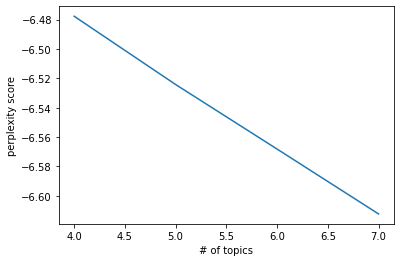

In [24]:
# 지표1: perplexity
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

max_Topics = 8

id2word = dictionary.id2token
perplexity_list = []
for i in tqdm(range(4, max_Topics)):
    ldamodel = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=i,
        passes=passes,
        eval_every=eval_every
    )
    perplexity_list.append(ldamodel.log_perplexity(corpus))

x = range(4, max_Topics)
plt.plot(x, perplexity_list)
plt.xlabel("# of topics")
plt.ylabel("perplexity score")
plt.show()

급격 하게 떨어지는 구간의 갯수 

### coherence score 지표를 이용하여 최적의 토픽 갯수 확인

토픽이 얼마나 의미론적으로 일관성이 있는지, 높을 수록 의미론적 일관성이 높음

100%|██████████| 4/4 [00:13<00:00,  3.47s/it]


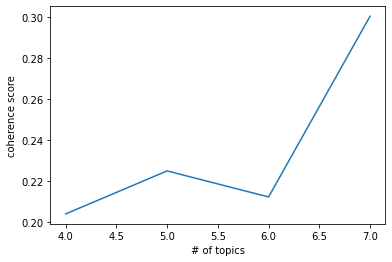

In [25]:
# 지표2: coherence score
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

coherence_list = []
for i in tqdm(range(4, max_Topics)):
    ldamodel = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=i,
    passes=passes,
    eval_every=eval_every
    )
    coherence_model_lda = CoherenceModel(
        model=ldamodel,
        texts=processed_data,
        dictionary=dictionary,
        topn=10
    )
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_list.append(coherence_lda)

x = range(4, max_Topics)
plt.plot(x, coherence_list)
plt.xlabel("# of topics")
plt.ylabel("coherence score")
plt.show()

coherence 수치가 가장 높은 지점의 갯수 선택 -> 8 개

In [ ]:
# plt.savefig('/content/drive/MyDrive/빕 구르망 예측/data/topic_modeling/LDA 결과/coherence.png',dpi=300)

### Modeling

In [26]:
# Modeling
num_topics = 6

# chunksize : 한 번의 트레이닝에 처리될 문서의 수
chunksize = 2000

# 트레이닝 수
passes = 20

# 코퍼스의 토픽 분포를 추론할 때 코퍼스를 통한 최대 반복 횟수
iterations = 400
eval_every = None

# 코퍼스 수가 적으면 passes를 높여주는 것이 유용할 수 있고, 시간만 충분하다면  iterations을 높여여면 학습이 더 잘됨.

random_state = 98


temp = dictionary[0]
id2word = dictionary.id2token

lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=random_state
)

In [27]:
lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_visualization)





In [ ]:

# 저장
pyLDAvis.save_html(lda_visualization, './after_more_oob_vis_34.html')


In [ ]:
print(df_10[df_10['review'].str.contains('주차')].values)

[[3 1 5
  '되게 맛있는데 전체적으로 꿀이 발려 있는지전체적으로 다 달았어요그 외에 너무 맛있었어요맥주 가격이 야악간 괴랄한데이쪽은 다 그런 것 같구주차는발레 필수에요그냥 차 가져오지 마세요맛은 진짜 있어요데이트 장소로는 추천혼자  남자끼리 ㄴㄴ']
 [3 3 5
  ' 오랜만에 가로수길 유명하다는 팬케잌집에 다녀왔어요 가격대가 있는반면 푸짐하게 잘 나와요 아메리카노는 무한리필이라 맘놓고 마셨어요 젊은 사람들로 아침부터 북적이네요 발레주차 두시간에 천원입니다']
 [3 3 5
  ' 저는 도보로 내점했는데 주차장이 있는데 주차요금을 받는 거 같아보였습니다 냉면짬뽕은 맵기 단계중에 고를 수 있는데 단계도 매웠어요 신라면보다 약간 더 매운 수준이었습니다 조리방식에 특허를 출원했다고 메뉴에 적혀있었는데 맛은 호불호가 갈릴 듯 합니다']
 [3 3 5
  ' 코엑스에 있는 아웃백은 코엑스 주차장이 아닌 오크우드 호텔 주차장이에요 ㅠㅠ 명이서 스테이크 먹었는데 파스타랑 샐러드와 함께하니 딱 적절했어요 스테이크파는 아니지만 따뜻할 때 먹으니 살살 녹더라고요 빵 시킬땐 초코소스 추가 요청해서 찍어먹으면 짱맛입니다요 투움바는 예전만큼 맛있지 않더라고요 ㅠ']
 [3 3 5
  '  생방송투데이에 소개된 브런치 카페 베이커리 종류 브런치 카페 음료 등 메뉴가 다양하고 많아요 인기있는 카페라 평일 오후에 방문했는데 손님 많았음 매장 뒤에 산이 있어서 야외테이블에 앉기 좋았지만 음료랑 빵은 무난한 맛 주차공간 넓은 편']
 [3 3 5
  ' 커피랑 그린티라떼는 맛있었고 초코 에끌레어는 생각보다 그냥 그렇습니다 이 근처에 이렇게 큰 카페 있어 가기 좋은거 같고 주차가 편해 좋습니다 커피나 차 마시기엔 좋아요']
 [3 3 5
  ' 사장님 엄청 쉬크하십니다 거리두기도 엄청 잘하시고 감동이였습니다아롱사태편육 얇게 썬 고기와 양파를 싸서 간장 소스에 찍어 먹는데 슴슴하니 괜찮았습니다냉면에 기대가 컸는지 기대했던 육향은 저에겐 좀 부족했던거 같습니다가게앞 주차 가능합니다']
 